In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head(),df.shape

(   age  affordibility  bought_insurance
 0   22              1                 0
 1   25              0                 0
 2   47              1                 1
 3   52              0                 0
 4   46              1                 1,
 (28, 3))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [4]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))



In [5]:
import numpy as np

# Generate an array of 20 random integers between 0 and 9 (inclusive)
random_integers = np.random.randint(0,len(X_train_scaled), 20)

print(random_integers)


[17 13 10  6 10 14  9  5 12 10 15  2  6  8  5  0  4 20  4 12]


In [6]:
#X_train_scaled['affordibility'].iloc[random_integers].head()

In [7]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [49]:
import random
random.randint(0,6)

6

In [83]:
#takes 1 as sample size
def gradient_descent(r_age, r_affordability, r_y_true, epochs, loss_thresold,sample_size):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(r_age)
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
       
        random_integers = [random.randint(0,len(r_age)-1)]
        print(random_integers,len(r_age))
        age=r_age.iloc[random_integers]
        affordability=r_affordability.iloc[random_integers]
        y_true=r_y_true.iloc[random_integers]
    
    
        
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        if i%1==0: # at every nth iteration record the cost and epoch value (increase n when data is big)
            cost_list.append(loss)
            epoch_list.append(i)

        if loss<=loss_thresold:
            break

    return w1, w2, bias,epoch_list,cost_list

In [84]:
#gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.1,5)

In [87]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.25,1)

[13] 22
Epoch:0, w1:0.991515794763599, w2:0.9815560755730414, bias:-0.40576633739309026, loss:1.6688306281601115
[3] 22
Epoch:1, w1:0.9946837865431523, w2:0.9870181303653747, bias:-0.2856011319617575, loss:0.2748716913685207
[1] 22
Epoch:2, w1:0.9913836241703358, w2:0.9870181303653747, bias:-0.535958277485767, loss:0.6945767840522674
[20] 22
Epoch:3, w1:0.9879151567134317, w2:0.9719378370744873, bias:-0.8677247298852876, loss:1.0892549201141486
[11] 22
Epoch:4, w1:0.9859287259300552, w2:0.9719378370744873, bias:-1.0425306388224198, loss:0.43018589107699884
[8] 22
Epoch:5, w1:0.9833798021232493, w2:0.9598001046611254, bias:-1.3095607519163808, loss:0.7636988939554099
[14] 22
Epoch:6, w1:0.9895146982972703, w2:0.9696950984901916, bias:-1.0918708876769232, loss:0.5716018595899939
[21] 22
Epoch:7, w1:0.9938795820528096, w2:0.9791839762196246, bias:-0.8831155776293973, loss:0.5404443256313206
[6] 22
Epoch:8, w1:0.9981367974274782, w2:0.9870677083949368, bias:-0.7096734697725284, loss:0.4260

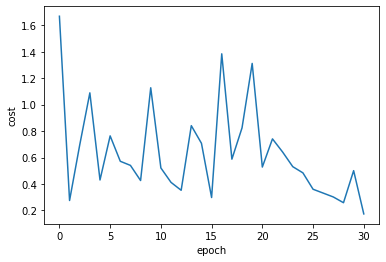

In [88]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(cost_list_mb, epoch_list_mb)